## DATA ANALYSIS

In [63]:
#importing pandas and matplolib
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
#loading data
path=r"C:\Users\SAI\OneDrive\Desktop\index.csv"
df=pd.read_csv(path)
df.head(3)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


In [106]:
#to maintain privacy of customers lets drop the card column
df_mod=df.drop(columns='card')
df_mod

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte
...,...,...,...,...,...
1203,2024-08-08,2024-08-08 12:43:19.558,card,23.02,Cortado
1204,2024-08-08,2024-08-08 12:44:14.953,card,23.02,Cortado
1205,2024-08-08,2024-08-08 16:57:53.266,card,32.82,Cappuccino
1206,2024-08-08,2024-08-08 17:17:51.749,card,32.82,Cappuccino


## Filtering data of only march(ie : 3rd month).

In [90]:
df_march = df_mod[df_mod['date'].dt.month == 3]

AttributeError: Can only use .dt accessor with datetimelike values

The above code didnt run successfully because the date column was not in datetime format so lets adjust it accordingly

In [188]:
# Converting the 'date' column to datetime format
df_mod['date'] = pd.to_datetime(df_mod['date'], format='%Y-%m-%d')

# Filtering the rows for the month of March (month = 3)
df_march = df_mod[df_mod['date'].dt.month == 3]
df_march

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte
...,...,...,...,...,...
201,2024-03-30,2024-03-30 16:12:31.786,card,38.7,Latte
202,2024-03-30,2024-03-30 16:36:40.513,card,38.7,Latte
203,2024-03-30,2024-03-30 16:37:57.553,card,33.8,Americano with Milk
204,2024-03-31,2024-03-31 10:40:04.523,card,38.7,Cappuccino


## DATA CLEANING

In [190]:
df_march = df_march.copy()  # Explicitly creating a copy
df_march.loc[:, 'datetime'] = pd.to_datetime(df_march['datetime'])

# Extracting the time and store it in a new 'time' column
df_march.loc[:, 'time'] = df_march['datetime'].dt.strftime('%H:%M')

# Dropping the 'datetime' column
df_march = df_march.drop(columns='datetime')

df_march


,date,cash_type,money,coffee_name,time
0,2024-03-01,card,38.7,Latte,10:15
1,2024-03-01,card,38.7,Hot Chocolate,12:19
2,2024-03-01,card,38.7,Hot Chocolate,12:20
3,2024-03-01,card,28.9,Americano,13:46
4,2024-03-01,card,38.7,Latte,13:48
...,...,...,...,...,...
201,2024-03-30,card,38.7,Latte,16:12
202,2024-03-30,card,38.7,Latte,16:36
203,2024-03-30,card,33.8,Americano with Milk,16:37
204,2024-03-31,card,38.7,Cappuccino,10:40


In [196]:
cols = list(df_march.columns)

# Remove 'time' from its current position
cols.remove('time')

# Insert 'time' between 'date' and 'cash_type'
cols.insert(cols.index('cash_type'), 'time')

df_march = df_march[cols]
df_march

,date,time,cash_type,money,coffee_name
0,2024-03-01,10:15,card,38.7,Latte
1,2024-03-01,12:19,card,38.7,Hot Chocolate
2,2024-03-01,12:20,card,38.7,Hot Chocolate
3,2024-03-01,13:46,card,28.9,Americano
4,2024-03-01,13:48,card,38.7,Latte
...,...,...,...,...,...
201,2024-03-30,16:12,card,38.7,Latte
202,2024-03-30,16:36,card,38.7,Latte
203,2024-03-30,16:37,card,33.8,Americano with Milk
204,2024-03-31,10:40,card,38.7,Cappuccino


In [210]:
#converting time column as 12 hour clock value
df_march['time']=pd.to_datetime(df_march['time'],format='%H:%M')
df_march['time'] = df_march['time'].apply(lambda x: x.strftime('%I:%M %p'))
df_march['time']

0      10:15 AM
1      12:19 PM
2      12:20 PM
3      01:46 PM
4      01:48 PM
         ...   
201    04:12 PM
202    04:36 PM
203    04:37 PM
204    10:40 AM
205    07:36 PM
Name: time, Length: 206, dtype: object

In [214]:
#saving the cleaned data
df_march.to_csv("coffee_data_in_march.csv", index=False)

## DATA VISUALISATION

In [232]:
##calculating amount generated by each coffee type
total_amount_by_type = df_march.groupby('coffee_name')['money'].sum()
print(total_amount_by_type)

coffee_name
Americano              1044.8
Americano with Milk    1154.0
Cappuccino              780.5
Cocoa                   232.2
Cortado                 869.2
Espresso                241.0
Hot Chocolate           854.0
Latte                  1874.5
Name: money, dtype: float64


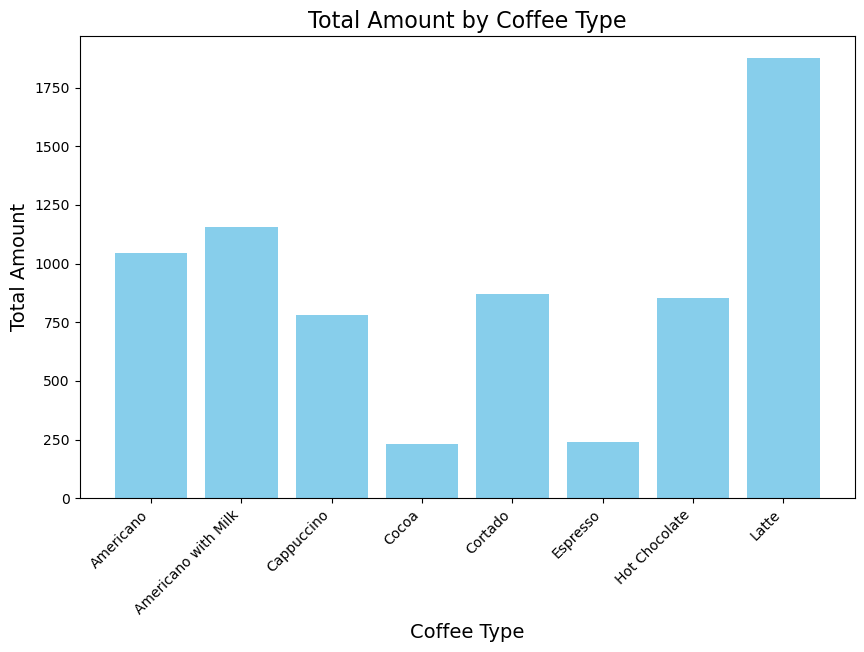

In [244]:
#plotting a bar praph for the sales based on coffee type
plt.figure(figsize=(10, 6))
plt.bar(total_amount_by_type.index, total_amount_by_type.values, color='skyblue')

# Adding title and labels
plt.title('Total Amount by Coffee Type', fontsize=16)
plt.xlabel('Coffee Type', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)

# Rotating the x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()

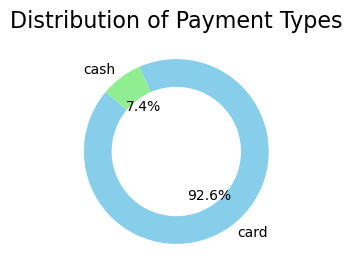

In [264]:
# Counting occurrences of each payment type
payment_counts = df['cash_type'].value_counts()

# Plotting a donut chart
plt.figure(figsize=(3,3))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140, wedgeprops=dict(width=0.3))

# Adding title
plt.title('Distribution of Payment Types', fontsize=16)

# Displaying the plot
plt.show()

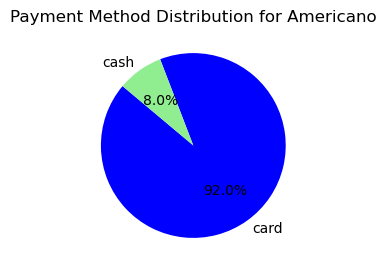

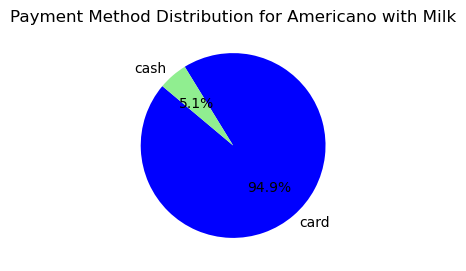

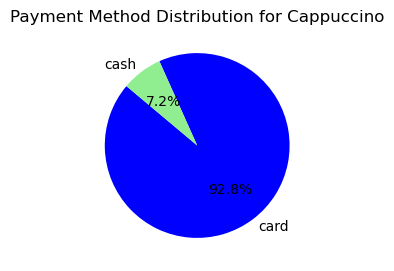

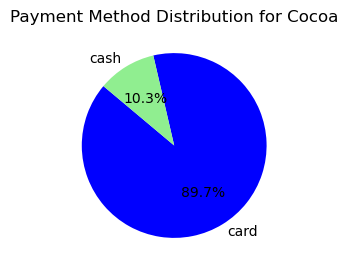

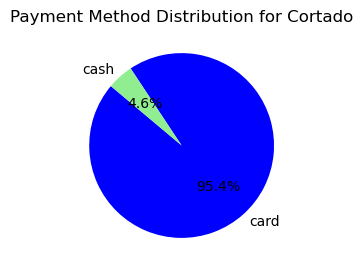

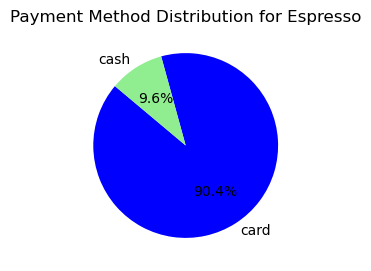

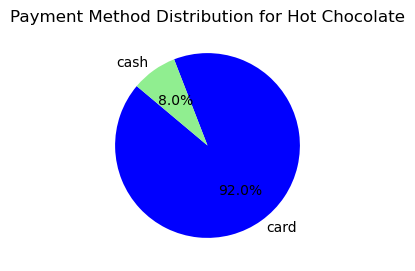

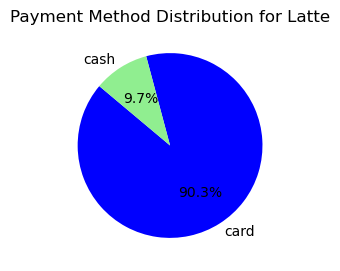

In [288]:
# Group by 'coffee_type' and get counts for each 'payment_type'
payment_counts = df.groupby('coffee_name')['cash_type'].value_counts().unstack(fill_value=0)

# Loop through each coffee type to create a pie chart
for coffee_name in payment_counts.index:
    counts = payment_counts.loc[coffee_name]
    plt.figure(figsize=(3,3))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'lightgreen'], startangle=140)
    plt.title(f'Payment Method Distribution for {coffee_name}', fontsize=12)
    plt.show()

custom_week
1    1837.5
2    2133.1
3    1114.3
4    1550.6
5     414.7
Name: money, dtype: float64


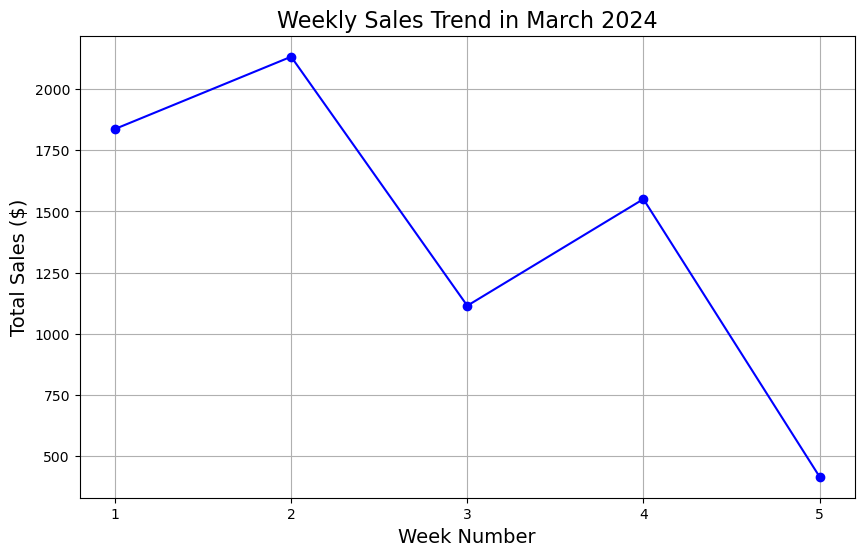

In [308]:
#showing sales in each week

# Converting 'date' to datetime
df_march['date'] = pd.to_datetime(df_march['date'])

# Defining custom week numbers for March
def get_custom_week(date):
    day = date.day
    if day <= 7:
        return 1
    elif day <= 14:
        return 2
    elif day <= 21:
        return 3
    elif day <= 28:
        return 4
    else:
        return 5

# Applying the custom week function
df_march['custom_week'] = df_march['date'].apply(get_custom_week)

# Aggregating sales by custom week
weekly_sales = df_march.groupby('custom_week')['money'].sum()

# Printing weekly sales data to verify correctness
print(weekly_sales)

# Plotting the sales trend over custom weeks
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Weekly Sales Trend in March 2024', fontsize=16)
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(weekly_sales.index)  # Ensure x-axis shows custom week numbers
plt.grid(True)
plt.show()